In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

In [4]:
env = Maze()

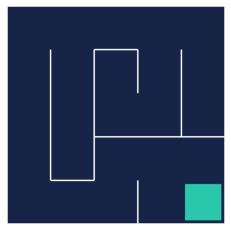

In [6]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [8]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


In [9]:
action_values = np.zeros((5,5,4))

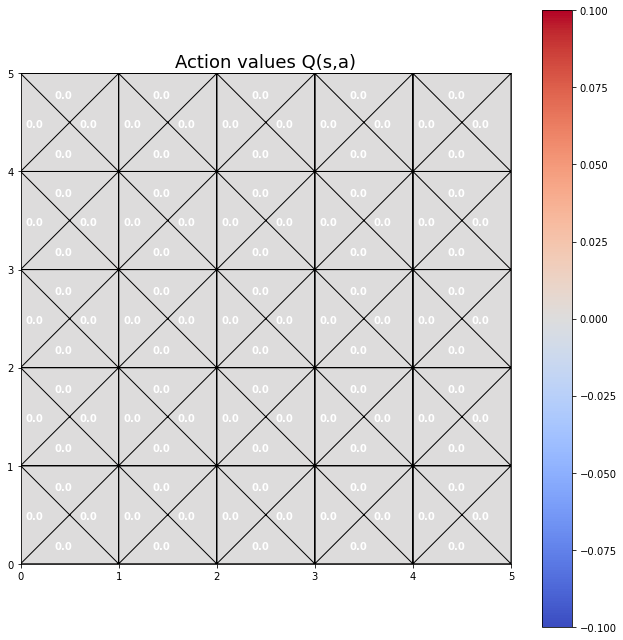

In [13]:
plot_action_values(action_values)

In [40]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [61]:
action = policy((0,0), epsilon = 0.5)
print(action)

1


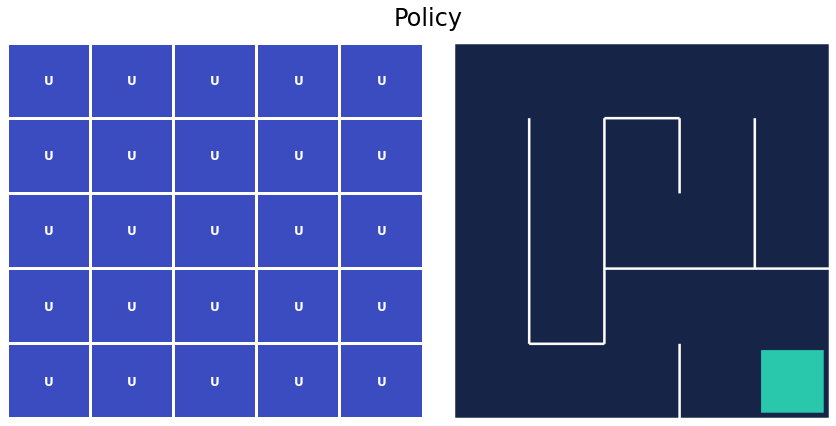

In [63]:
plot_policy(action_values, frame)

In [72]:
def on_policy_montecarlo_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2 ):
    sa_returns = {}
    
    for episodes in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
        
        G = 0
        
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma*G
            
            if not (state_t, action_t) is sa_returns:
                sa_returns[(state_t, action_t)] = []
            
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [83]:
on_policy_montecarlo_control(policy, action_values, episodes=100)

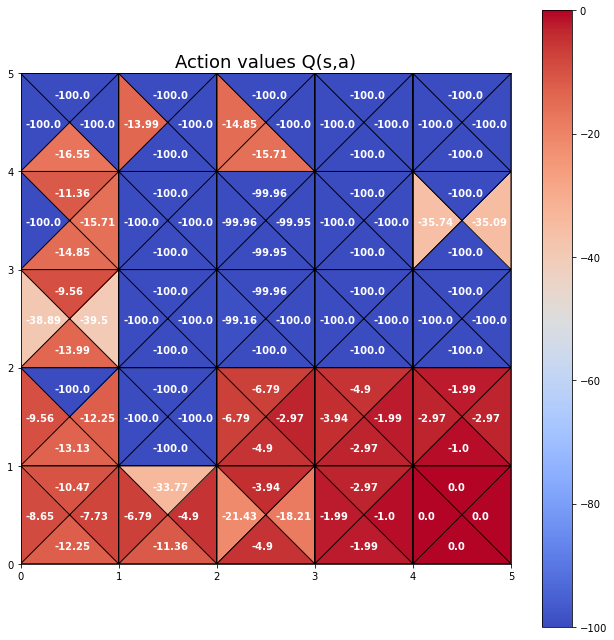

In [85]:
plot_action_values(action_values)

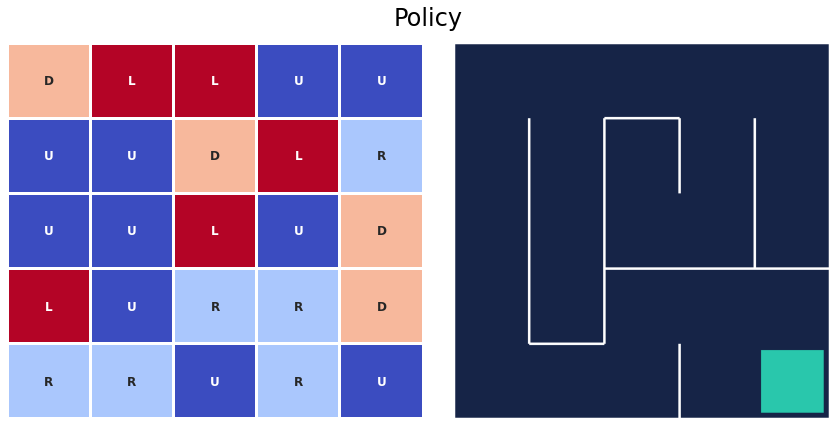

In [87]:
plot_policy(action_values, frame)

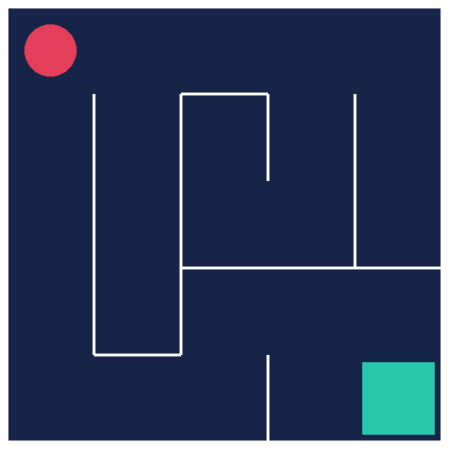

In [ ]:
test_agent(env, policy)